<a href="https://colab.research.google.com/github/SyedHuzaifa007/Concrete-Strength-Prediction-Model/blob/main/Credit_Card_Fraud_Detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams

In [28]:
# Loading The Data
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
# Configuring Modules
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale = 1.5)
rcParams['figure.figsize'] = 14, 8
Random_Seed = 42

In [30]:
# Renaming Columns
df.rename(columns = {"Class": "Fraud"}, inplace = True)

In [31]:
 df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.shape

(284807, 31)

In [34]:
# Checking Data For Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Fraud     0
dtype: int64

OUR DATA CONTAINS NO NULL VALUES

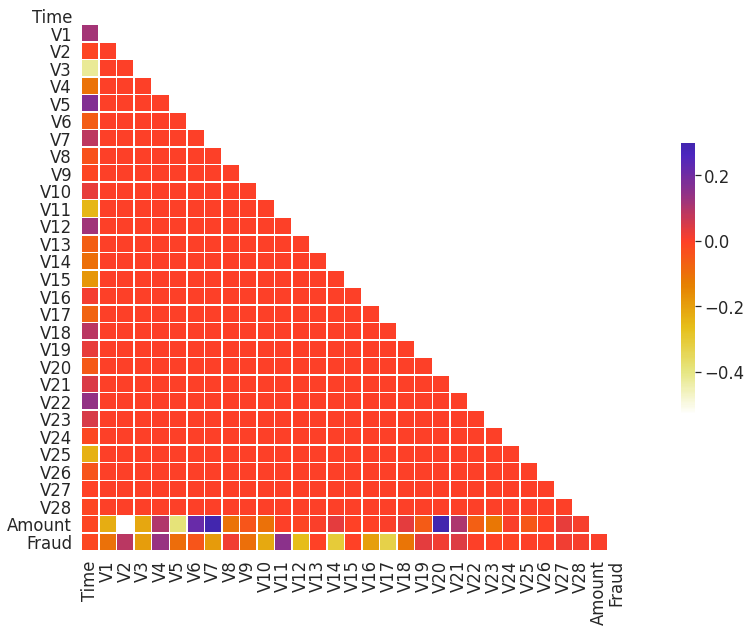

In [35]:
# Checking Correlations
corr = df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# figure size
f, ax = plt.subplots(figsize=(20, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='CMRmap_r', vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

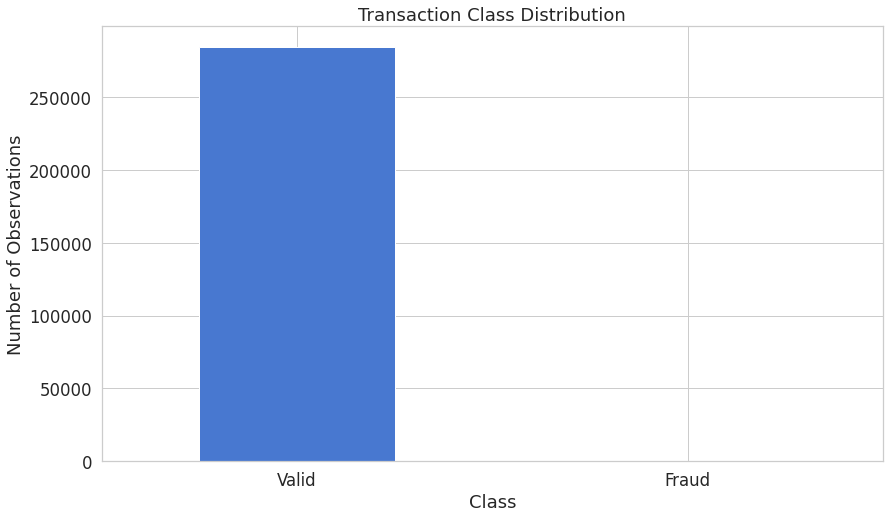

In [36]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
labels = ['Valid', 'Fraud']
count_classes = pd.value_counts(df['Fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [37]:
len(df)

284807

There are total 284807 number of transactions

In [62]:
len_fraud = len(df[df.Fraud ==  1])
len_fraud

492

Out of 284807 transactions 492 are the fraud transactions

In [63]:
len_valid = 284807 - 492
len_valid

284315

Out of 284807 transactions 284315 are the valid transactions

In [64]:
perc_fraud = (len_fraud * 100) / len(df)
perc_fraud

0.1727485630620034

As you can see out of total transactions only 0.17 % are the fraud transactions.It means that we have highly imbalance dataset in our hand. There is a large margin between the valid transactions and fraud transactions.

In [70]:
# Renaming The Columns
Fraud_df = df[df.Fraud == 1]
Valid_df = df[df.Fraud == 0]

In [71]:
# Checking Important Stats of Amount used in Fraud Transactions
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [72]:
# Checking Imprtant Stats of Amount used in Valid Transactions
Valid_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

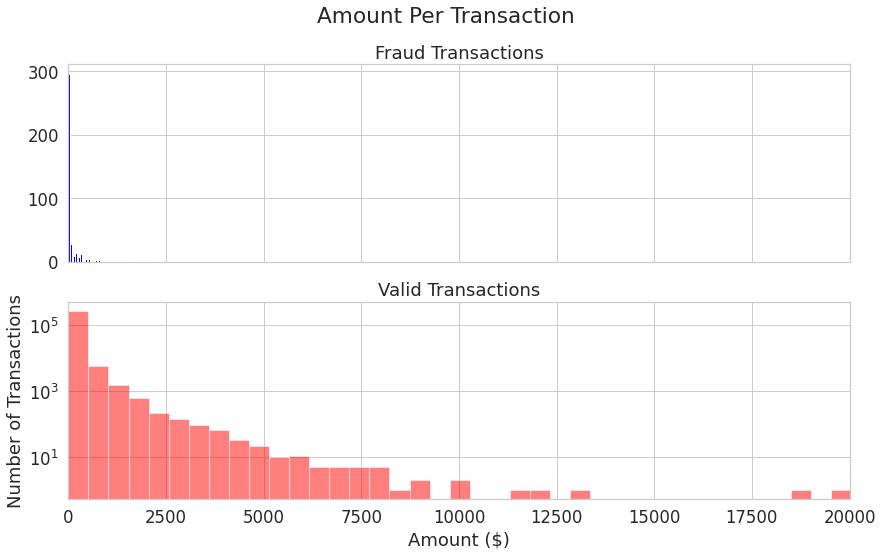

In [73]:
# Amount per transaction by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount Per Transaction')

bins = 50

ax1.hist(Fraud_df.Amount, bins = bins, color='blue')
ax1.set_title('Fraud Transactions')

ax2.hist(Valid_df.Amount, bins = bins, color='red', alpha = 0.5)
ax2.set_title('Valid Transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

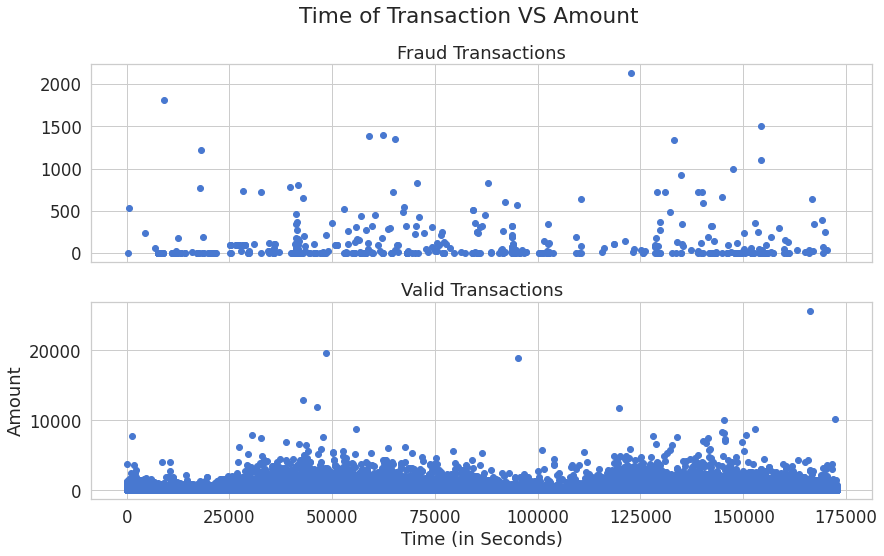

In [75]:
# Time of transaction vs Amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction VS Amount')

ax1.scatter(Fraud_df.Time, Fraud_df.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid_df.Time,Valid_df.Amount)
ax2.set_title('Valid Transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [76]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

Splitting Into Testing and Training Data

In [77]:
# Training Data
train_data = df_norm.iloc[:199365,:]
train_data.shape

(199365, 31)

In [78]:
# Testing Data
test_data = df_norm.iloc[199365:,:]
test_data.shape

(85442, 31)

In [79]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [80]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
199365,0.802626,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,-1.256213,-0.762171,0.086847,-0.133543,0.365813,1.400839,-0.115840,-1.594770,1.026636,0.060715,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,-0.129536,0
199366,0.802626,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,0.583293,0.884700,0.831223,-0.293394,-0.870717,1.653737,-1.335181,0.431294,-1.605950,-0.198616,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,-0.350071,0
199367,0.802626,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,1.020453,0.808519,0.179530,0.403686,-1.355320,-0.890292,-0.823874,-0.161798,-0.240885,-0.209666,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,-0.229689,0
199368,0.802647,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,0.826612,-0.315592,-1.848798,-0.465431,-0.757847,0.571839,0.262660,0.450587,0.023705,-0.090654,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,-0.346113,0
199369,0.802647,2.005556,-0.146704,-1.019430,0.330239,-0.180449,-0.953319,0.053860,-0.165823,0.352282,0.255342,0.953976,0.886864,-0.546470,0.579937,-0.610841,0.088436,-0.475671,-0.341351,0.402815,-0.241755,-0.235137,-0.613122,0.342269,0.063677,-0.359509,0.174021,-0.078440,-0.069642,-0.331760,0


In [81]:
# Shuffling Training And Testing Data
train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [82]:
test_data.sample(frac = 1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
199365,0.802626,2.152590,-0.900447,-1.092456,-0.994969,-0.613447,-0.760012,-0.530218,-0.222248,-0.214416,0.746967,-1.256213,-0.762171,0.086847,-0.133543,0.365813,1.400839,-0.115840,-1.594770,1.026636,0.060715,-0.281725,-0.987236,0.358646,-0.782338,-0.480245,-0.647930,-0.023563,-0.044354,-0.129536,0
199366,0.802626,1.811278,0.224393,0.542888,3.606222,-0.162910,1.171241,-0.874598,0.419449,-0.546470,1.493825,0.583293,0.884700,0.831223,-0.293394,-0.870717,1.653737,-1.335181,0.431294,-1.605950,-0.198616,0.109290,0.345703,0.365984,0.663253,-0.531272,-0.225013,0.032563,-0.022693,-0.350071,0
199367,0.802626,-1.524832,-0.544095,-0.288824,-0.916791,3.524219,-1.830070,1.375925,-0.814647,-0.648070,-0.072189,1.020453,0.808519,0.179530,0.403686,-1.355320,-0.890292,-0.823874,-0.161798,-0.240885,-0.209666,0.272832,1.245119,-0.867245,0.838885,0.860487,-0.081074,-0.252743,-0.377957,-0.229689,0
199368,0.802647,0.099135,0.873164,-0.362487,-0.612234,0.747229,-0.629384,0.755890,0.126794,-0.051667,-0.613531,0.826612,-0.315592,-1.848798,-0.465431,-0.757847,0.571839,0.262660,0.450587,0.023705,-0.090654,-0.302759,-0.840999,0.115856,0.613080,-0.528392,0.092546,0.207960,0.071553,-0.346113,0
199369,0.802647,2.005556,-0.146704,-1.019430,0.330239,-0.180449,-0.953319,0.053860,-0.165823,0.352282,0.255342,0.953976,0.886864,-0.546470,0.579937,-0.610841,0.088436,-0.475671,-0.341351,0.402815,-0.241755,-0.235137,-0.613122,0.342269,0.063677,-0.359509,0.174021,-0.078440,-0.069642,-0.331760,0


In [83]:
# Droping Labels From Testing And Training Data
train_labels = train_data.pop('Fraud')
train_labels = train_labels.values
test_labels = test_data.pop('Fraud')
test_labels = test_labels.values

In [84]:
train_labels

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
test_labels

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
# Building Base Model
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = (train_data.shape[-1],)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [88]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [89]:
# Fitting Model
history = model.fit(train_data, train_labels, epochs = 100)

Epoch 1/100
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0310 - accuracy: 0.9981
Epoch 2/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 3/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 4/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 5/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 6/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 7/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 8/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 9/100
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 10/100
6231/6231 [==============================] - 7s 1ms/step - l

In [91]:
# Storing History In A Data Frame
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,accuracy
95,0.001869,0.999529
96,0.001762,0.999534
97,0.001745,0.999549
98,0.001789,0.999523
99,0.001837,0.999508


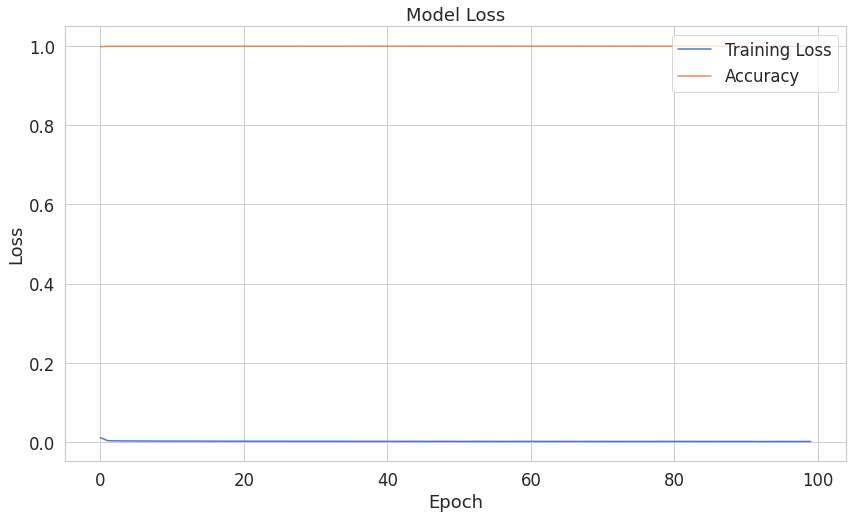

In [93]:
# Plotting Loss
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Accuracy'], loc='upper right');

In [94]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions = predictions.flatten()

In [95]:
predictions

array([2.7007809e-09, 1.0686219e-03, 3.0547750e-17, ..., 1.0109219e-05,
       1.8491955e-06, 8.8767091e-09], dtype=float32)

In [97]:
testing = model.evaluate(test_data, test_labels)

2671/2671 [==============================] - 2s 787us/step - loss: 0.0050 - accuracy: 0.9995


In [98]:
print(f"Test Loss: {testing[0]}")
print(f"Test Accuracy: {testing[1]}")

Test Loss: 0.0049925874918699265
Test Accuracy: 0.9995318651199341


# Building Second Model For Validation Data

In [100]:
# Building Second Model
model2 = Sequential()
model2.add(Dense(10, activation = 'relu', input_shape = (train_data.shape[-1],)))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dense(6, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [101]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [110]:
# Fitting Model
history1 = model2.fit(train_data, train_labels, epochs = 100, batch_size = 32, shuffle=True, validation_split=0.2, verbose = 1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0744 - accuracy: 0.9793 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 2/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 3/100
4985/4985 [==============================] - 6s 1ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 4/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 5/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 6/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0048 - val_accuracy: 0.9986
Epoch 7/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0034 - val_ac

In [112]:
# Storing History In A Data Frame
history_df1 = pd.DataFrame(history1)
history_df1.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.001300,0.999574,0.009385,0.998746
96,0.001287,0.999542,0.008730,0.999197
97,0.001209,0.999586,0.009500,0.998922
98,0.001180,0.999668,0.009723,0.999097
99,0.001168,0.999630,0.010863,0.998596


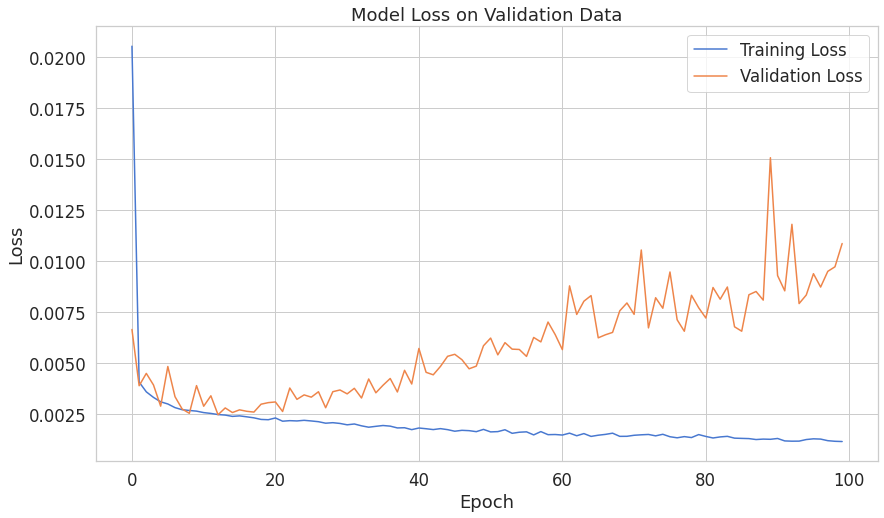

In [115]:
# Plotting Loss on Validation Data
plt.plot(history_df1['loss'])
plt.plot(history_df1['val_loss'])
plt.title('Model Loss on Validation Data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right');

## **Overfitting**
### As we can see that our model is overfitted because it is most probably unable to discriminate between valid transactions and fraud transactions because the mass of fraud transactions is very low as compared to the valid transactions and our model can treat them as normal transactions. Lets overcome this problem.








### I am using here normalization technique to overcome overfitting. Let's see it works or not.

In [ ]:
# Normal Distribution of the Classes

# Shuffling Data
df = df.sample(frac=1)

# Amount of Fraud Classes
fraud_df = df.loc[df['Fraud'] == 1]
non_fraud_df = df.loc[df['Fraud'] == 0] [:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffling DataFrame Rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
37340,38915.0,0.963509,-0.145489,0.244346,1.363054,-0.534689,-0.843156,0.266334,-0.193699,0.081263,0.022207,-0.541824,-0.216343,-0.670213,0.505541,1.035221,0.202338,-0.426546,0.049084,-0.514631,0.095950,0.146483,0.119036,-0.223208,0.389033,0.597640,-0.293507,-0.012980,0.044874,144.00,0
124036,77154.0,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,1.500629,-0.417898,-1.590295,-1.074999,0.288234,1.377769,0.223887,1.311073,-0.896072,-0.186978,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,129.00,1
206089,136062.0,0.179425,0.459563,-0.274027,-0.509078,1.094935,-0.187408,0.850863,-0.082497,-0.384299,-0.289698,-0.149805,0.731040,0.543407,0.217046,-1.116737,0.037818,-0.791725,0.087234,1.139021,0.024983,-0.119551,-0.297488,0.034322,-1.010702,-0.698509,0.262177,0.059221,0.082485,27.19,0
235634,148476.0,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,-4.816401,2.155796,-6.285125,-1.125625,-6.800098,0.924934,-5.239604,-5.017908,-1.349309,2.868603,0.452241,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1
244004,152165.0,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,-2.325113,4.355770,-8.663031,-1.153993,-13.481705,1.208454,-4.287960,-5.651765,-1.235889,1.080133,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1.00,1


Distribution of the Classes in the New DataFrame
1    0.5
0    0.5
Name: Fraud, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


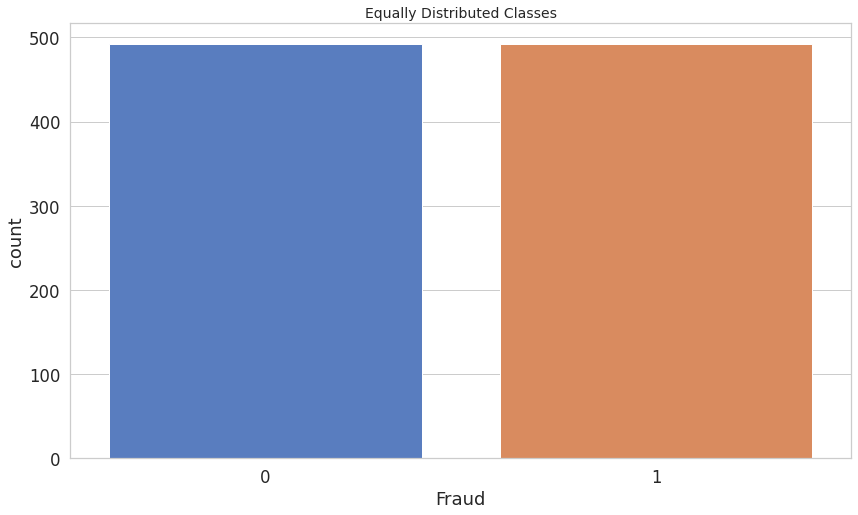

In [ ]:
# Visualizing The Dataframe
print('Distribution of the Classes in the New DataFrame')
print(new_df['Fraud'].value_counts()/len(new_df))
sns.countplot('Fraud', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

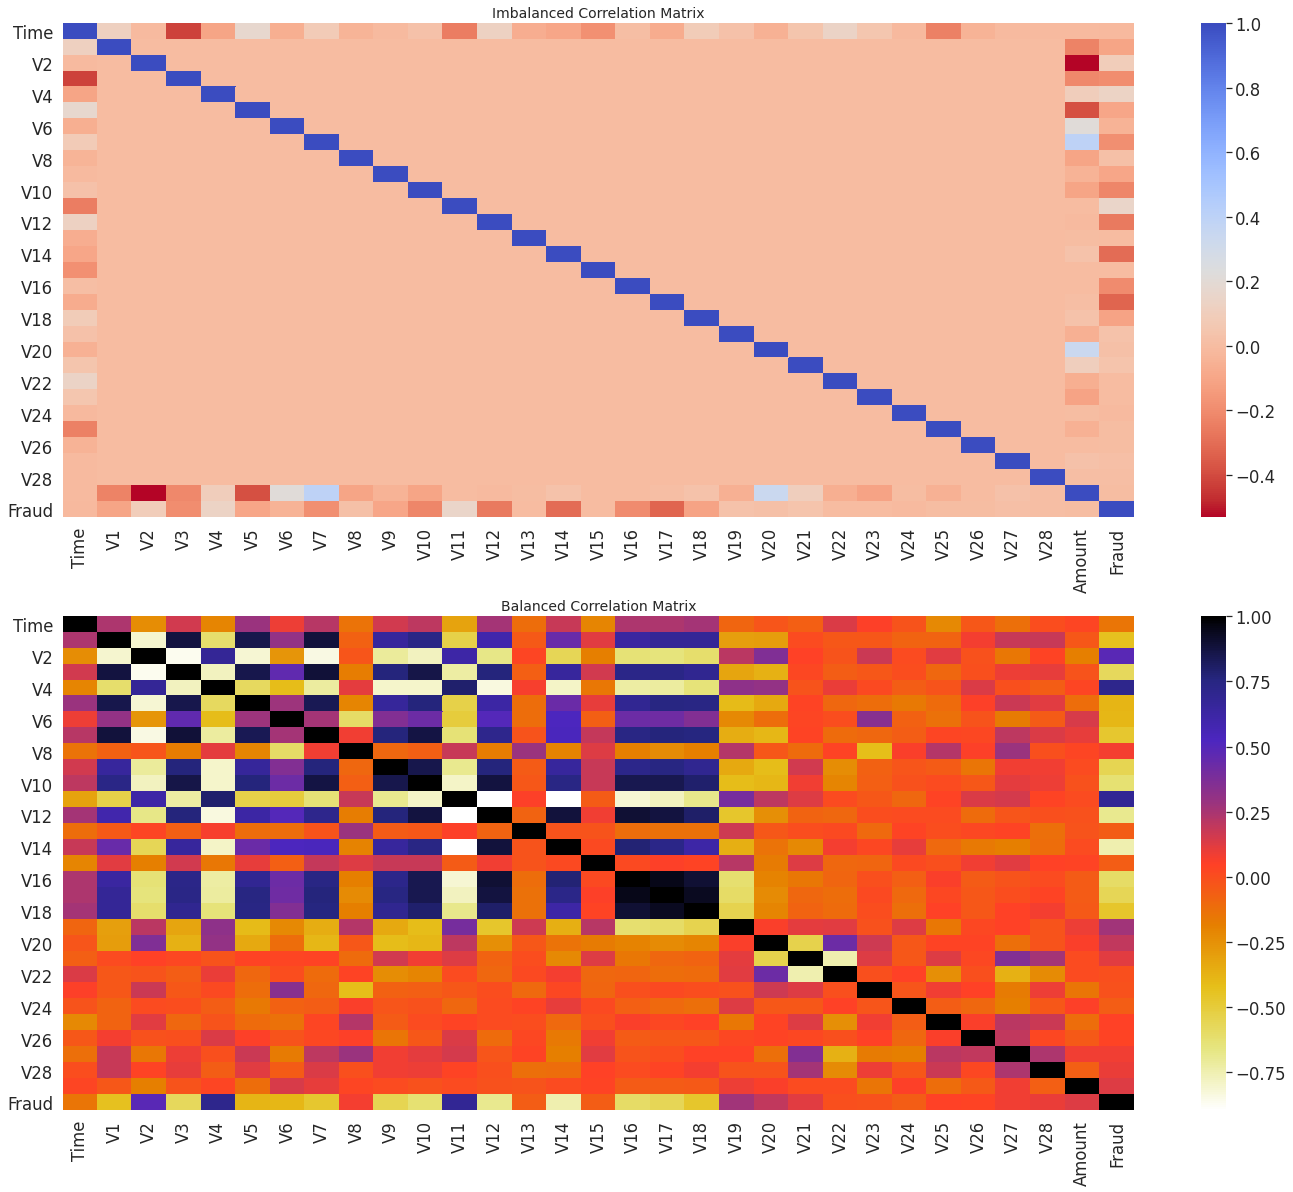

In [ ]:
# Making a Heatmap To Check New Dataset Correlation

# Original Unbalanced DataSet
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

# New Balanced Dataset
new_corr = new_df.corr()
sns.heatmap(new_corr, cmap='CMRmap_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Balanced Correlation Matrix', fontsize=14)
plt.show()

In [ ]:
# Checking New DataSet
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
37340,38915.0,0.963509,-0.145489,0.244346,1.363054,-0.534689,-0.843156,0.266334,-0.193699,0.081263,0.022207,-0.541824,-0.216343,-0.670213,0.505541,1.035221,0.202338,-0.426546,0.049084,-0.514631,0.095950,0.146483,0.119036,-0.223208,0.389033,0.597640,-0.293507,-0.012980,0.044874,144.00,0
124036,77154.0,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,1.500629,-0.417898,-1.590295,-1.074999,0.288234,1.377769,0.223887,1.311073,-0.896072,-0.186978,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,129.00,1
206089,136062.0,0.179425,0.459563,-0.274027,-0.509078,1.094935,-0.187408,0.850863,-0.082497,-0.384299,-0.289698,-0.149805,0.731040,0.543407,0.217046,-1.116737,0.037818,-0.791725,0.087234,1.139021,0.024983,-0.119551,-0.297488,0.034322,-1.010702,-0.698509,0.262177,0.059221,0.082485,27.19,0
235634,148476.0,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,-4.816401,2.155796,-6.285125,-1.125625,-6.800098,0.924934,-5.239604,-5.017908,-1.349309,2.868603,0.452241,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1
244004,152165.0,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,-1.528448,-2.325113,4.355770,-8.663031,-1.153993,-13.481705,1.208454,-4.287960,-5.651765,-1.235889,1.080133,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1.00,1


In [ ]:
df.shape

(284807, 31)

In [ ]:
new_df.shape

(984, 31)

In [ ]:
# Splitting New Dataset Into Training and Testing Dataset
new_train_data = new_df.iloc[:688,:]

In [ ]:
new_test_data = new_df.iloc[688:,:]

In [ ]:
# Separating The Labels From Training And Testing Data
new_train_labels = new_train_data.pop('Fraud')
new_test_labels = new_test_data.pop('Fraud')

In [ ]:
# Making Second Model For Balanced DataSet

model2 = tf.keras.models.Sequential()
model2.add(Dense(256, activation = 'relu', input_shape=(new_train_data.shape[-1],)))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'sigmoid'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
from keras import optimizers
optimizer = optimizers.Adam(0.01)
model2.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 256)               7936      
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)               

In [ ]:
# Fitting Model2
history1 = model2.fit(new_train_data, new_train_labels, batch_size=1024, epochs = 50, verbose = 2, validation_split = 0.2)

Epoch 1/50
1/1 - 1s - loss: 0.7269 - accuracy: 0.5527 - val_loss: 0.6926 - val_accuracy: 0.5290
Epoch 2/50
1/1 - 0s - loss: 0.7352 - accuracy: 0.5273 - val_loss: 0.7149 - val_accuracy: 0.4710
Epoch 3/50
1/1 - 0s - loss: 0.7583 - accuracy: 0.4982 - val_loss: 0.6916 - val_accuracy: 0.5290
Epoch 4/50
1/1 - 0s - loss: 0.7083 - accuracy: 0.5273 - val_loss: 0.6957 - val_accuracy: 0.5290
Epoch 5/50
1/1 - 0s - loss: 0.7199 - accuracy: 0.5055 - val_loss: 0.6923 - val_accuracy: 0.5290
Epoch 6/50
1/1 - 0s - loss: 0.7495 - accuracy: 0.4764 - val_loss: 0.6915 - val_accuracy: 0.5290
Epoch 7/50
1/1 - 0s - loss: 0.7590 - accuracy: 0.4382 - val_loss: 0.6917 - val_accuracy: 0.5290
Epoch 8/50
1/1 - 0s - loss: 0.7176 - accuracy: 0.5109 - val_loss: 0.6994 - val_accuracy: 0.4710
Epoch 9/50
1/1 - 0s - loss: 0.7215 - accuracy: 0.4964 - val_loss: 0.7131 - val_accuracy: 0.4710
Epoch 10/50
1/1 - 0s - loss: 0.7348 - accuracy: 0.4909 - val_loss: 0.7225 - val_accuracy: 0.4710
Epoch 11/50
1/1 - 0s - loss: 0.7382 - a

In [ ]:
# Feeding History in a Data Frame
history1_df = pd.DataFrame(history1.history)
history1_df.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.704604,0.490909,0.692757,0.528986
46,0.702646,0.501818,0.693833,0.471014
47,0.698857,0.512727,0.695584,0.471014
48,0.700983,0.514545,0.697765,0.471014
49,0.695612,0.518182,0.699463,0.471014


In [ ]:
predictions1 = model2.predict(new_test_data)
predictions

array([0.00191203, 0.00191203, 0.00191203, ..., 0.00191203, 0.00191203,
       0.00191203], dtype=float32)

In [ ]:
testing1 = model2.evaluate(new_test_data,new_test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4764


In [ ]:
print(f"Loss:{testing1[0]}")
print(f"Accuracy:{testing1[1]}")

Loss:0.6987320184707642
Accuracy:0.4763513505458832
